<a href="https://colab.research.google.com/github/mervefilizbaker1/DRIVER-RISK-PREDICTION/blob/main/DRP_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DRIVER RISK PREDICTION - DATA

In [19]:
#libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_accident= pd.read_csv(r'/content/cleaned.csv')
df_driver= pd.read_csv(r'/content/dataset_traffic_accident_prediction1.csv')

In [3]:
print(df_accident.info())
print(df_accident.head())
print(df_accident.describe(include='all'))
print(df_accident['Accident_severity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [4]:
print(df_driver.info())
print(df_driver.head())
print(df_driver.describe(include='all'))
print(df_driver['Accident'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB
None
  Weather   Road_Type

In [5]:
df_accident.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [6]:
df_driver.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [8]:
categorical_columns = df_accident.select_dtypes(include=['object']).columns

In [9]:
categorical_columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')

In [10]:
# OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,drop="first")
encoded_data = encoder.fit_transform(df_accident[categorical_columns])

In [11]:
# Convert the encoded data back into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [12]:
# Remove the original categorical columns from the original DataFrame and add the encoded ones
df_accident_encoded = pd.concat([df_accident.drop(categorical_columns, axis=1),encoded_df],axis=1)

In [13]:
print(df_accident_encoded.head())
print(df_accident_encoded.shape)

   Accident_severity  Age_band_of_driver_31-50  Age_band_of_driver_Over 51  \
0                  2                       0.0                         0.0   
1                  2                       1.0                         0.0   
2                  1                       0.0                         0.0   
3                  2                       0.0                         0.0   
4                  2                       0.0                         0.0   

   Age_band_of_driver_Under 18  Age_band_of_driver_Unknown  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   Sex_of_driver_Male  Sex_of_driver_Unknown  \
0                 1.0                    0.0   
1                 1.0                    0.0   
2             

In [14]:
#Filling Missing Values for the Driver Dataset
numerical_columns = df_driver.select_dtypes(include=['float64']).columns

In [15]:
# Fill missing values in numerical columns with the median
for col in numerical_columns:
    df_driver[col].fillna(df_driver[col].median(),inplace=True)

/tmp/ipython-input-1255714775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_driver[col].fillna(df_driver[col].median(),inplace=True)


In [16]:
categorical_columns = df_driver.select_dtypes(['object']).columns

In [17]:
# Fill missing values in categorical columns with the mode
for col in categorical_columns:
    df_driver[col].fillna(df_driver[col].mode()[0],inplace=True)

/tmp/ipython-input-761599728.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_driver[col].fillna(df_driver[col].mode()[0],inplace=True)


In [18]:
print(df_driver.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        840 non-null    float64
 7   Accident_Severity     840 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          840 non-null    object 
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    object 
 13  Accident              840 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB
None


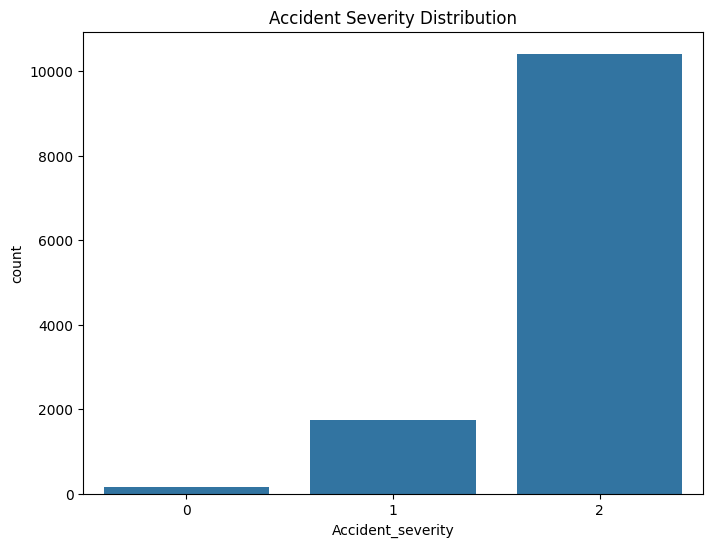

In [20]:
# Distribution of Accident_severity
plt.figure(figsize=(8,6))
sns.countplot(x='Accident_severity', data=df_accident)
plt.title('Accident Severity Distribution')
plt.show()

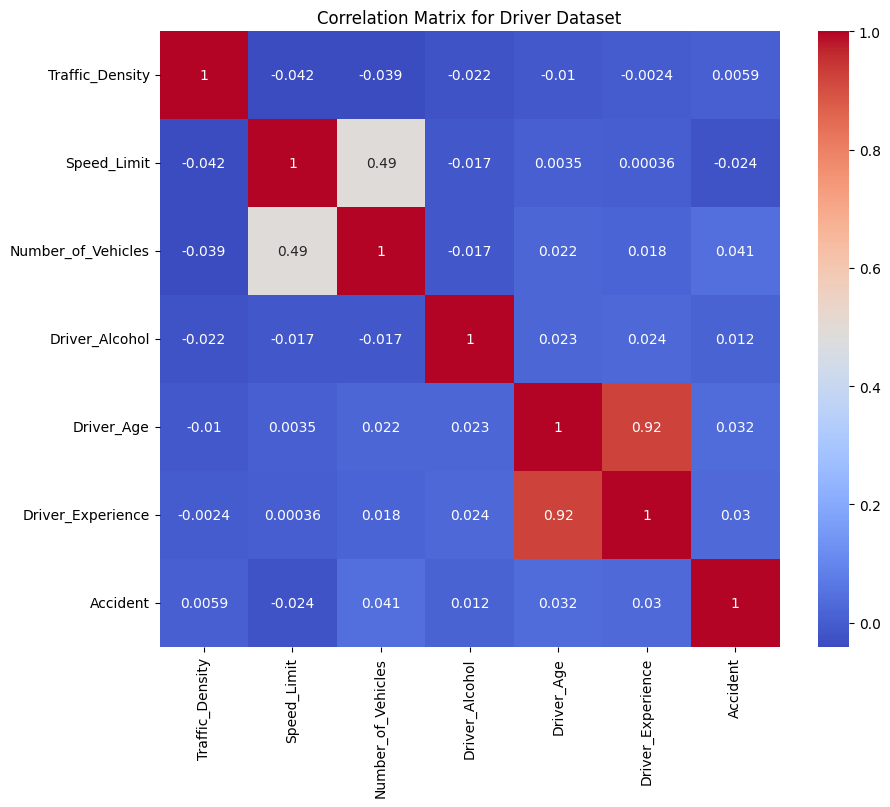

In [21]:
# Correlation analysis for numerical columns in the Driver dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_driver[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Driver Dataset')
plt.show()

FEATURE ENGINEERING

In [22]:
def normalize_columns(df):
    df = df.copy()
    df.columns = [c.strip().replace(" ", "_") for c in df.columns]
    return df

In [23]:
driver = normalize_columns(df_driver)
accident = normalize_columns(df_accident)

In [24]:
# DRIVER RISK

def driver_risk(row):
    score = 0

    # Age band
    age_band = str(row.get("Age_band_of_driver", "")).lower()
    if "under 18" in age_band or "over 51" in age_band:
        score += 1.0
    elif "31-50" in age_band or "18-30" in age_band :
        score += 0.5
    else:
        score += 0.1

    # Driving experience
    exp = str(row.get("Driving_experience", "")).lower()
    if "no license" in exp or "below 1yr" in exp:
        score += 1.0
    elif "1-2yr" in exp :
        score += 0.7
    elif "5-10yr" in exp or "2-5yr" in exp:
        score += 0.5
    elif "above 10yr" in exp :
        score += 0.2
    else:
        score += 0.5

    # Education
    edu = str(row.get("Educational_level", "")).lower()
    if "illiterate" in edu or "elementary " in edu:
        score += 1.0
    elif "high" in edu or "junior" in edu:
        score += 0.5
    elif "college" in edu or "university" in edu:
        score += 0.2
    else:
        score += 0.5

    # Alcohol
    alc = driver["Driver_Alcohol"].mean() if "Driver_Alcohol" in driver.columns else 0
    if alc > 1:
        score += 1.0
    else:
        score += 0.2

    return score / 4  # normalize 0–1


In [25]:
df_accident_encoded["driver_risk_score"] = accident.apply(driver_risk, axis=1)

In [26]:
# ENVIRONMENTAL RISK

def env_risk(row):
    score = 0
    count = 0

    # Weather
    weather = str(row.get("Weather_conditions", "")).lower()
    count += 1
    if any(x in weather for x in ["raining", "fog", "mist", "windy", "snow"]):
        score += 1.0
    elif "cloud" in weather:
        score += 0.3
    else:
        score += 0.1

    # Road_surface_type
    road = str(row.get("Road_surface_type", "")).lower()
    count += 1
    if "earth" in road or "gravel" in road:
        score += 1.0
    elif "distress" in road:
        score += 0.5
    else:
        score += 0.1

    # Light conditions
    light = str(row.get("Light_conditions", "")).lower()
    count += 1
    if "dark" in light:
        score += 1.0
    elif "daylight" in light:
        score += 0.3
    else:
        score += 0.5

    # Junction
    junc = str(row.get("Types_of_Junction", "")).lower()
    count += 1
    if "no junction" in junc:
        score += 0.3
    elif "crossing" in junc or "t-junction" in junc:
        score += 0.7
    else:
        score += 0.5

    return score / count


In [27]:
df_accident_encoded["env_risk_score"] = accident.apply(env_risk, axis=1)

In [28]:
#BEHAVIOURAL RISK

high_risk_causes = ['No distancing', 'Drunk driving', 'Overtaking', 'Driving carelessly', 'Driving under the influence']
medium_risk_causes = [ 'Driving at high speed']
low_risk_causes = ['No priority to vehicle', 'No priority to pedestrian', 'Other', 'Unknown', 'Getting off','Changing lane to the left', 'Changing lane to the right']



In [29]:
def behaviour_risk(cause):
    if pd.isna(cause):
        return 0.5
    cause = str(cause).strip()
    if cause in high_risk_causes:
        return 1.0
    elif cause in medium_risk_causes:
        return 0.6
    elif cause in low_risk_causes:
        return 0.2
    else:
        return 0.5

In [30]:
df_accident_encoded["behaviour_risk_score"] = accident["Cause_of_accident"].apply(behaviour_risk)

In [31]:
#RISK SCORE
df_accident_encoded["total_risk_score"] = (
    df_accident_encoded["driver_risk_score"] +
    df_accident_encoded["env_risk_score"] +
    df_accident_encoded["behaviour_risk_score"]
) / 3

In [32]:
def classify_risk(score):
    if score < 0.4:
        return "Low"
    elif score < 0.7:
        return "Medium"
    else:
        return "High"

In [33]:
df_accident_encoded["risk_class"] = df_accident_encoded["total_risk_score"].apply(classify_risk)

In [34]:
df_accident_encoded.head(10)

,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,...,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,driver_risk_score,env_risk_score,behaviour_risk_score,total_risk_score,risk_class
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.475,0.200,0.5,0.391667,Low
1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.350,0.200,1.0,0.516667,Medium
2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.475,0.200,0.2,0.291667,Low
3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.425,0.650,0.2,0.425000,Medium
4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.425,0.425,1.0,0.616667,Medium
5,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.425,0.250,0.5,0.391667,Low
6,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.425,0.300,0.2,0.308333,Low
7,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.425,0.250,0.2,0.291667,Low
8,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.350,0.475,0.2,0.341667,Low
9,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.475,0.250,0.5,0.408333,Medium


In [36]:
df_accident_encoded.to_csv('/content/drive/MyDrive/DRP/df_accident', index=False)